In [20]:
import matplotlib.pyplot as plt
import mpl_lego as mplego
import itertools
import krippendorff
import numpy as np
import pandas as pd
import seaborn as sns

from functools import partial
from mpl_lego.labels import bold_text
from pyprojroot import here
from scipy.stats import bootstrap

from moral_foundations_llms import keys

%matplotlib inline

In [21]:
mplego.style.use_latex_style()

In [22]:
df = pd.read_csv(here('data/aita_final_v15.csv'))

/var/folders/6h/ms_dpkl536d1w6qqd_wnckrw0000gn/T/ipykernel_47796/2259072775.py:1: DtypeWarning: Columns (29,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(here('data/aita_final_v15.csv'))


In [23]:
alphas = pd.DataFrame(data=0,
                      index=keys.LABEL_NUM_COLS,
                      columns=keys.LABEL_NUM_COLS)

for col1, col2 in itertools.combinations(keys.LABEL_NUM_COLS, 2):
    alpha = krippendorff.alpha(df[[col1, col2]].values.T)
    alphas.loc[col1, col2] = alpha
    alphas.loc[col2, col1] = alpha

In [45]:
np.ones((5, 5)) - np.identity(5)

array([[0., 1., 1., 1., 1.],
       [1., 0., 1., 1., 1.],
       [1., 1., 0., 1., 1.],
       [1., 1., 1., 0., 1.],
       [1., 1., 1., 1., 0.]])

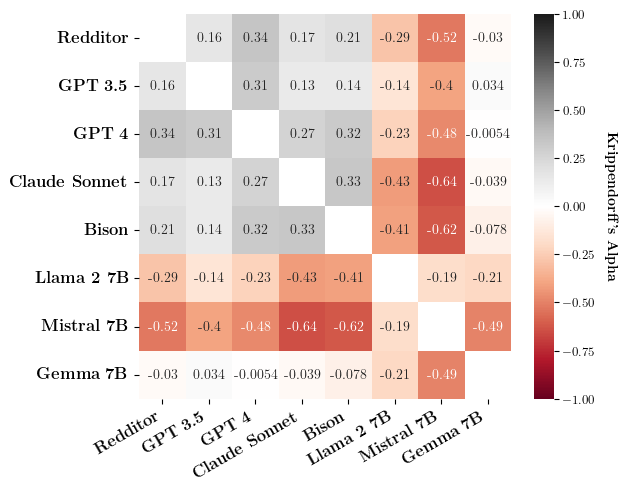

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
sns.heatmap(alphas,
            cmap='RdGy',
            vmin=-1,
            vmax=1,
            annot=True,
            cbar_kws={'label': "Krippendorff's Alpha"},
            mask=np.identity(keys.n_models),
            ax=ax)

cbar = ax.collections[0].colorbar
cbar.set_label(bold_text("Krippendorff's Alpha"), rotation=270, labelpad=15)
cbar.ax.tick_params(labelsize=9)

ax.set_xticklabels(bold_text(keys.MODEL_LABELS_PLOT), rotation=30, fontsize=12, ha='right')
ax.set_yticklabels(bold_text(keys.MODEL_LABELS_PLOT), fontsize=12, ha='right')
plt.savefig('agreement.pdf', bbox_inches='tight')